---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        weights /= (np.max(weights)/2)
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
        plt.axis('off');
    else:
        nx.draw_networkx(G, pos, edges=edges);
        plt.axis('off');

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
def answer_one():
    
    return nx.read_edgelist('data/Employee_Movie_Choices.txt', delimiter='\t')

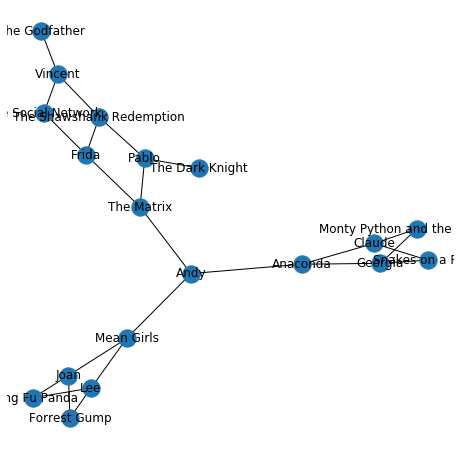

In [3]:
plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [4]:
def answer_two():
    
    G = answer_one()
    
    for node in G.nodes():
        if node in employees:
            G.add_node(node, instance='employee')
        elif node in movies:
            G.add_node(node, instance='Movie')
    
    return G

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [5]:
def answer_three():
        
    G = answer_two()
    P = bipartite.weighted_projected_graph(G, employees)
    
    return P

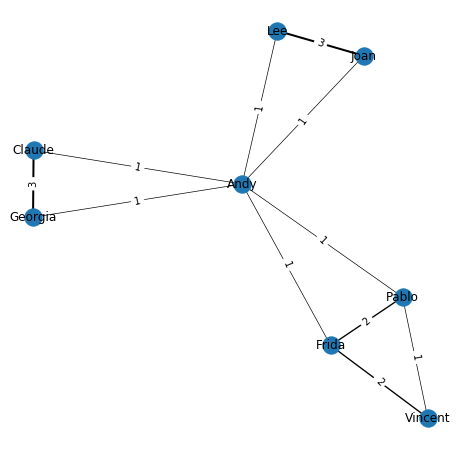

In [6]:
plot_graph(answer_three(), weight_name='weight')

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [7]:
def answer_four():
        
    # worker relationships scores
    relationships = nx.read_edgelist('data/Employee_Relationships.txt', data=[('relationship_score', int)])
    df_relationships = pd.DataFrame(relationships.edges(data=True), columns=['worker 1', 'worker 2', 'relationship_score'])
    df_relationships['relationship_score'] = df_relationships['relationship_score'].apply(lambda x: x['relationship_score'])
    
    # worker common movies
    movies_graph = answer_three()
    df_common_movies = pd.DataFrame(movies_graph.edges(data=True), columns=['worker 1', 'worker 2', 'common movies'])
    df_common_movies['common movies'] = df_common_movies['common movies'].apply(lambda x: x['weight'])
    
    # join
    df = df_common_movies.merge(df_relationships, how='right', on=['worker 1', 'worker 2'])
    df.fillna(0, inplace=True)
    
    # find correlation
    corr_df = df['relationship_score'].corr(df['common movies'])
    
    return corr_df

In [8]:
print(f'Correlation between workers relationship score and number of movies they have in common: {round(answer_four(), 3)}')

Correlation between workers relationship score and number of movies they have in common: 0.643
